In [23]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
# Daten einlesen
df = pd.read_csv('2002-2023.csv', index_col=False)

df.head()

,PropType,Address,District,Nbhd,Style,Extwall,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,Residential,3033 N 35TH ST,7,2960,AP 1,Frame,2.0,1913,0,3476,4,9,1,0,5040,2002-02,42000
1,Residential,1908 E WEBSTER PL,3,3170,Rm or Rooming House,Frame,2.0,1897,0,1992,4,2,2,0,2880,2002-05,145000
2,Residential,812 N 25TH ST,4,3040,Rm or Rooming House,Frame,2.0,1907,0,2339,6,0,1,0,3185,2002-06,30000
3,Residential,959 N 34TH ST,4,2300,AP 1,Frame,2.0,1890,0,2329,4,4,1,0,5781,2002-10,66500
4,Residential,3209 W WELLS ST,4,2300,Mansion,Stone,2.5,1891,0,7450,2,7,6,0,15600,2002-11,150500


In [25]:
df.shape

(46713, 17)

In [ ]:
data.info()

In [ ]:
data.nunique()

In [1]:
from ydata_profiling import ProfileReport

/Users/leabeckmann/opt/anaconda3/envs/ads_ml/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [13]:
import numpy as np


In [12]:
profile.to_file("Pandas Profiling Report.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 19.31it/s]


## Data cleaning

In [26]:
# Nullwerte anschauen
df.isna().sum()

PropType      0
Address       0
District      0
Nbhd          0
Style         0
Extwall       0
Stories       0
Year_Built    0
Nr_of_rms     0
Fin_sqft      0
Units         0
Bdrms         0
Fbath         0
Hbath         0
Lotsize       0
Sale_date     0
Sale_price    0
dtype: int64

In [27]:
# Dataframe Typen anschauen
df.dtypes

PropType       object
Address        object
District        int64
Nbhd            int64
Style          object
Extwall        object
Stories       float64
Year_Built      int64
Nr_of_rms       int64
Fin_sqft        int64
Units           int64
Bdrms           int64
Fbath           int64
Hbath           int64
Lotsize         int64
Sale_date      object
Sale_price      int64
dtype: object

In [28]:
# Verkaufsdatum in datetime ändern
df['Sale_date'] = pd.to_datetime(df['Sale_date'])

In [29]:
df.dtypes

PropType              object
Address               object
District               int64
Nbhd                   int64
Style                 object
Extwall               object
Stories              float64
Year_Built             int64
Nr_of_rms              int64
Fin_sqft               int64
Units                  int64
Bdrms                  int64
Fbath                  int64
Hbath                  int64
Lotsize                int64
Sale_date     datetime64[ns]
Sale_price             int64
dtype: object

In [30]:
df.head()

,PropType,Address,District,Nbhd,Style,Extwall,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,Residential,3033 N 35TH ST,7,2960,AP 1,Frame,2.0,1913,0,3476,4,9,1,0,5040,2002-02-01,42000
1,Residential,1908 E WEBSTER PL,3,3170,Rm or Rooming House,Frame,2.0,1897,0,1992,4,2,2,0,2880,2002-05-01,145000
2,Residential,812 N 25TH ST,4,3040,Rm or Rooming House,Frame,2.0,1907,0,2339,6,0,1,0,3185,2002-06-01,30000
3,Residential,959 N 34TH ST,4,2300,AP 1,Frame,2.0,1890,0,2329,4,4,1,0,5781,2002-10-01,66500
4,Residential,3209 W WELLS ST,4,2300,Mansion,Stone,2.5,1891,0,7450,2,7,6,0,15600,2002-11-01,150500


In [31]:
# Sale_date trennen
df['year_sold'] = df['Sale_date'].dt.year
df['month_sold'] = df['Sale_date'].dt.month

In [32]:
df.drop(['Sale_date', 'PropType', 'Address'], axis=1, inplace=True)
#PropType, da in dem Profilingreport deutlich wird, dass es vom "Commercial" im Vgl. zu den "Residential" zu große Differenzen gibt 
#Address, da zu viele distinct Variablen

In [72]:
df.head()

,District,Nbhd,Style,Extwall,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_price,year_sold,month_sold
0,7,2960,AP 1,Frame,2.0,1913,0,3476,4,9,1,0,5040,42000,2002,2
1,3,3170,Rm or Rooming House,Frame,2.0,1897,0,1992,4,2,2,0,2880,145000,2002,5
2,4,3040,Rm or Rooming House,Frame,2.0,1907,0,2339,6,0,1,0,3185,30000,2002,6
3,4,2300,AP 1,Frame,2.0,1890,0,2329,4,4,1,0,5781,66500,2002,10
4,4,2300,Mansion,Stone,2.5,1891,0,7450,2,7,6,0,15600,150500,2002,11


In [33]:
df.columns

Index(['District', 'Nbhd', 'Style', 'Extwall', 'Stories', 'Year_Built',
       'Nr_of_rms', 'Fin_sqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize',
       'Sale_price', 'year_sold', 'month_sold'],
      dtype='object')

In [34]:
# Dulikate löschen
df.duplicated().sum()

48

In [35]:
df.drop_duplicates(inplace=True)

In [36]:
df.duplicated().sum()

0

## EDA
Übergeordnetes Ziel: Das beste Modell zur Vorhersage des Verkaufspreises von Immobilien entwickeln

EDA Ziel: Exploration des Datensatzes inklusive aussagekräftiger Visualisierungen & Erläuterung bzw. Ableitung aus der Exploration, welcher Wert vorhergesagt wird (Verkaufspreis)

Git Repo als Inspiration https://github.com/ongaunjie1/real-estate-price-prediction/blob/master/regression.ipynb

In [32]:
colors = ['royalblue', 'cornflowerblue', 'lightsteelblue', 'slategrey']

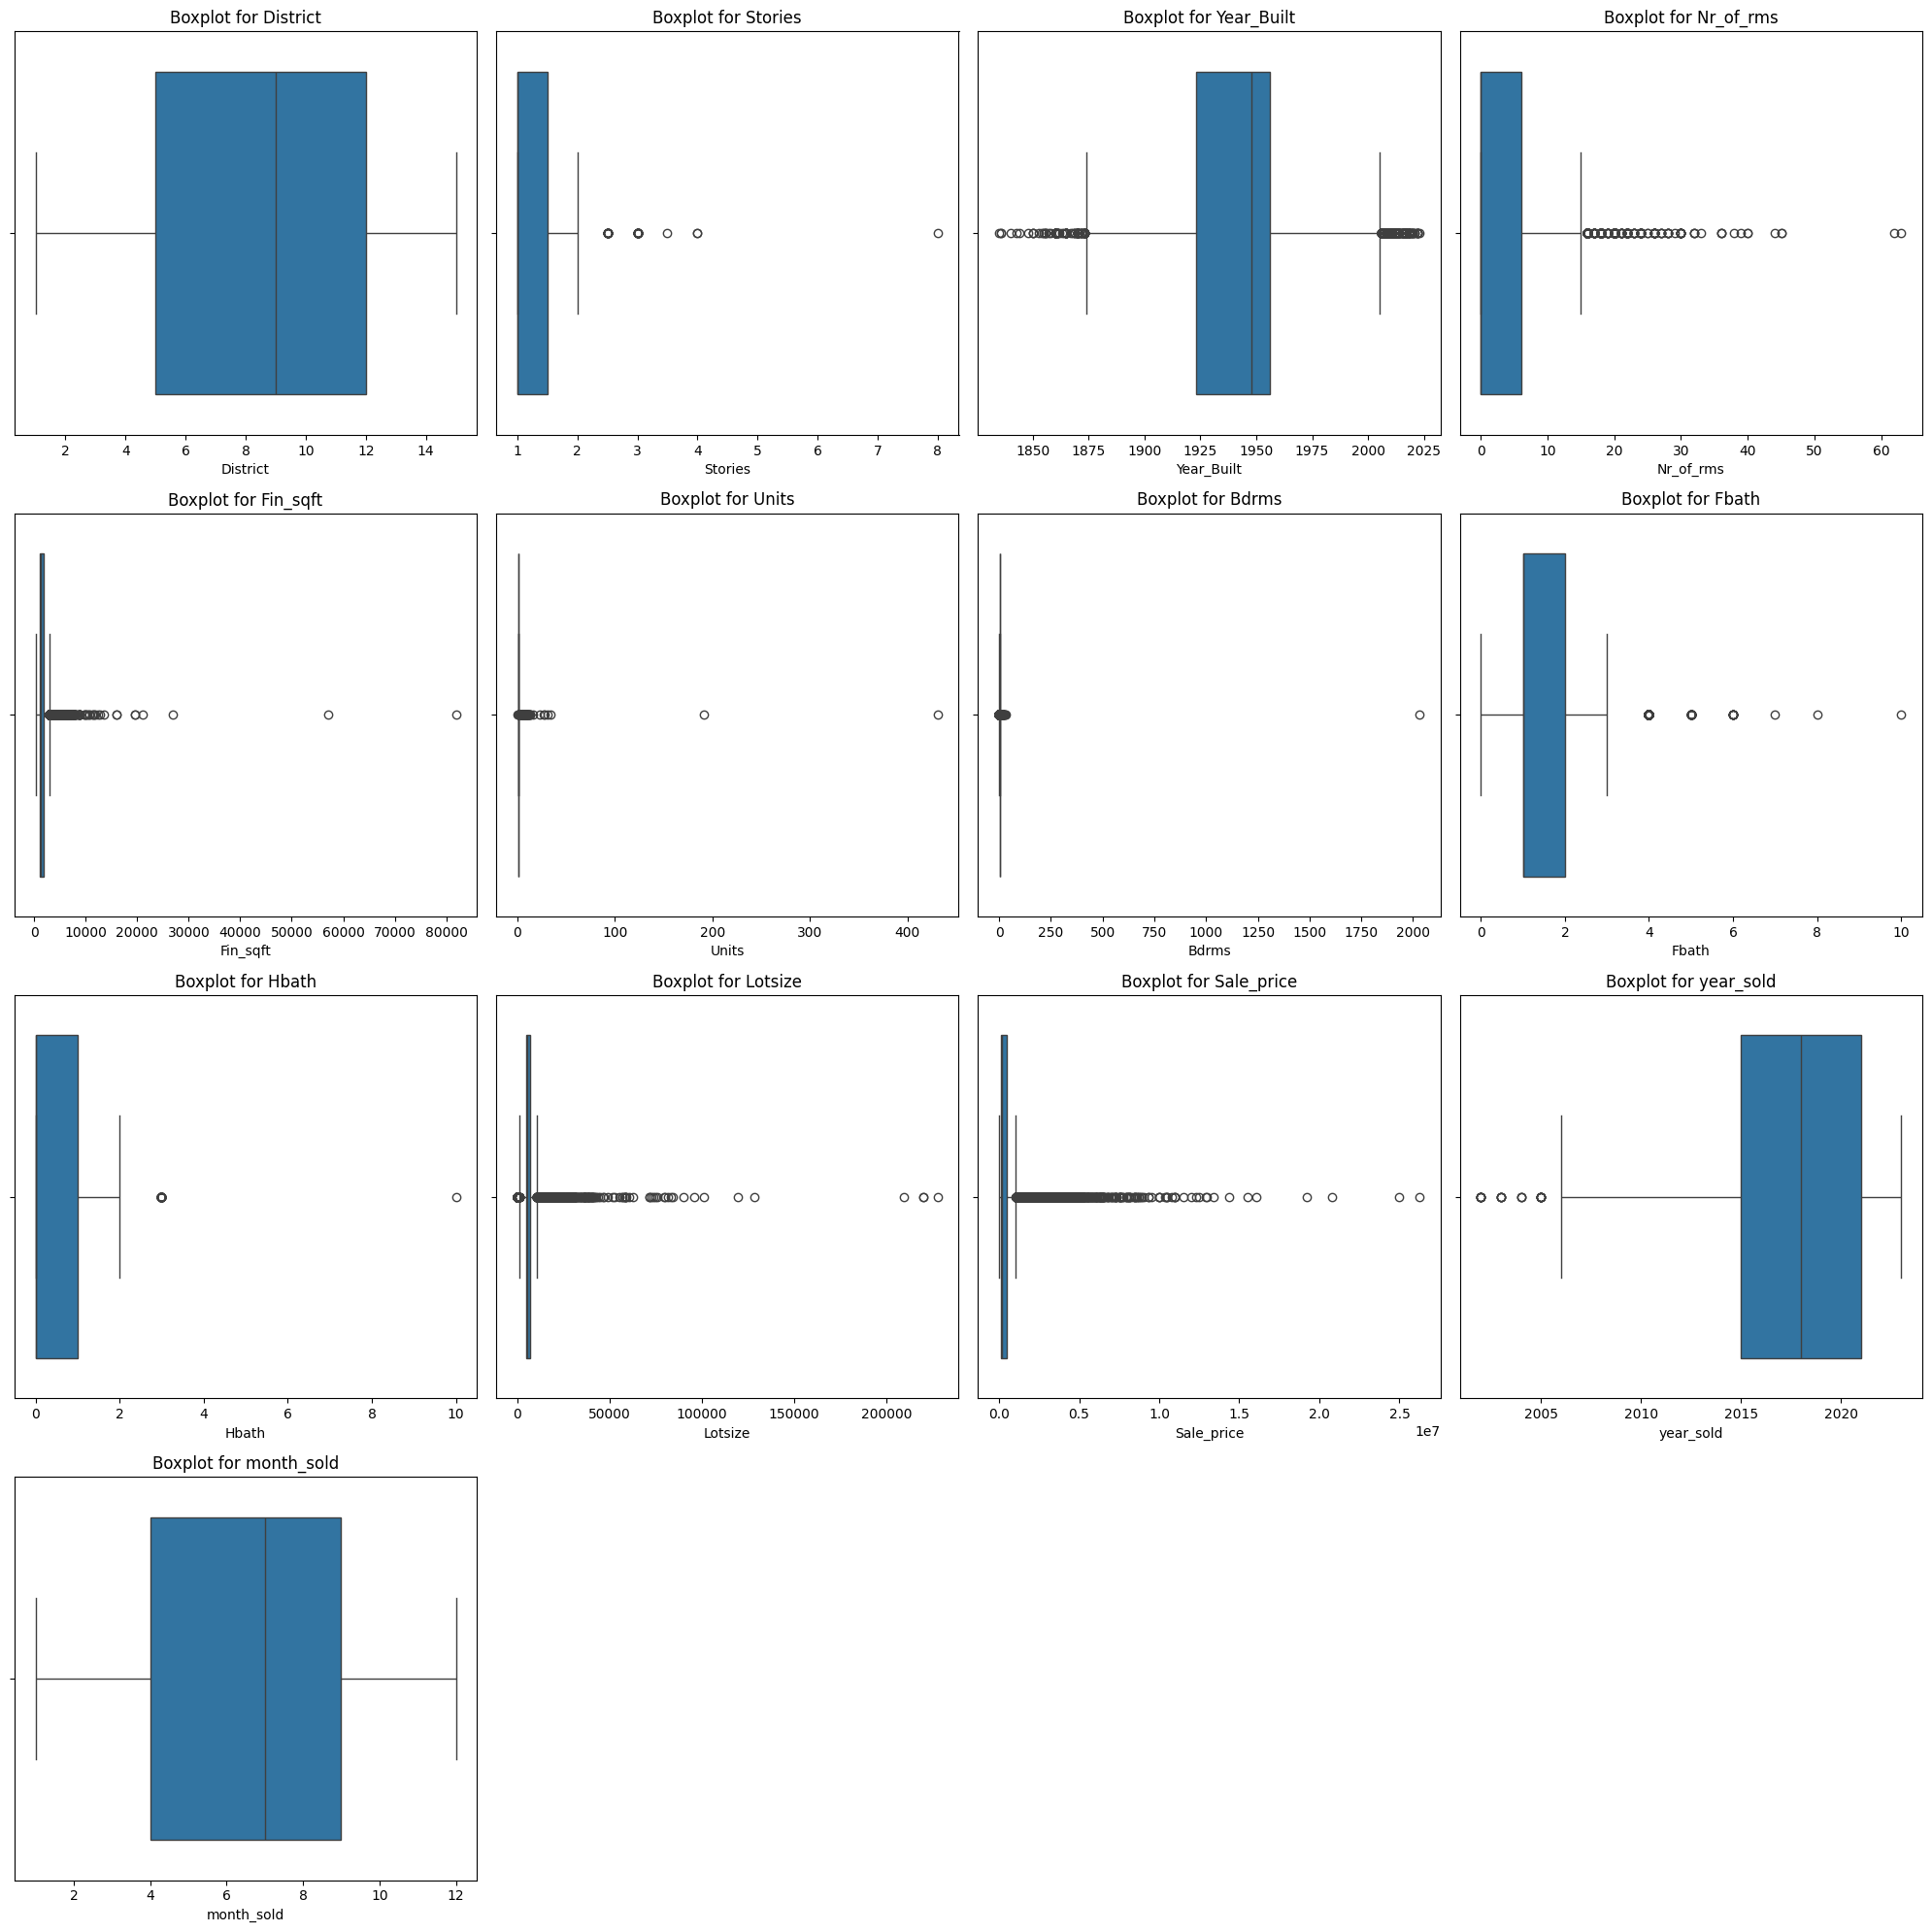

In [33]:
# Numerische Spalten
numeric_columns = ['District','Stories', 'Year_Built', 'Nr_of_rms', 'Fin_sqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'Sale_price', 'year_sold', 'month_sold']


num_cols = 4 
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))


if num_rows == 1 or num_cols == 1:
    axes = axes.flatten()

# Erstellung Boxplot
for i, col in enumerate(numeric_columns):
    if num_rows > 1 or num_cols > 1:
        sns.boxplot(x=df[col], ax=axes[i // num_cols, i % num_cols])
    else:
        sns.boxplot(x=df[col], ax=axes[i])
    axes[i // num_cols, i % num_cols].set_title(f'Boxplot for {col}')

# Entfernen leerer Achsen
for j in range(len(numeric_columns), num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()


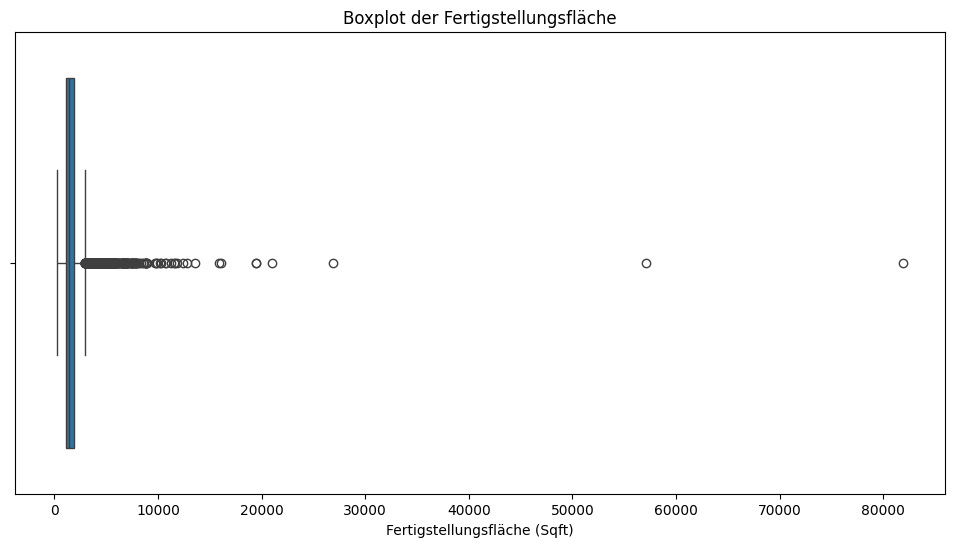

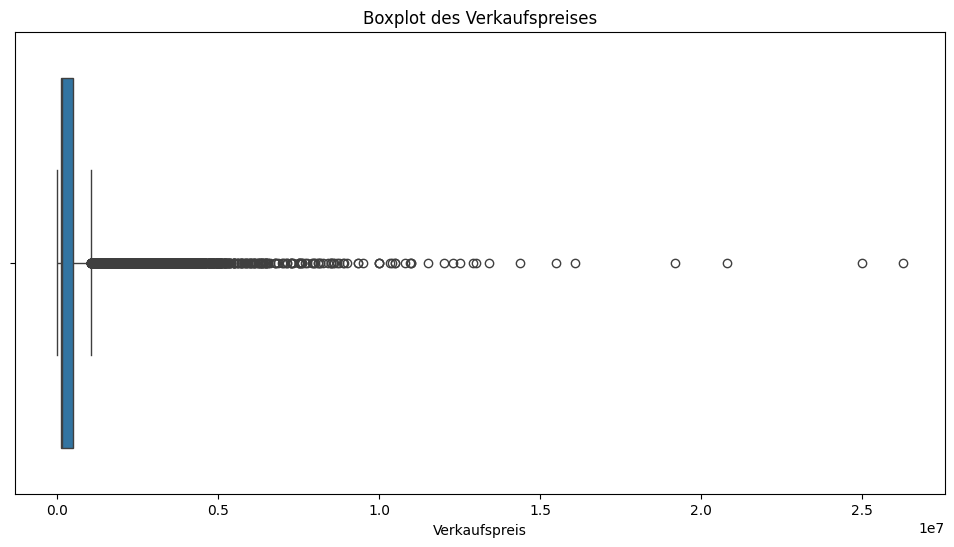

In [42]:
# Boxplot genauer anschauen
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fin_sqft', data=df)
plt.title('Boxplot der Fertigstellungsfläche')
plt.xlabel('Fertigstellungsfläche (Sqft)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Sale_price', data=df)
plt.title('Boxplot des Verkaufspreises')
plt.xlabel('Verkaufspreis')
plt.show()


In [43]:
# Ausreißer
df[df['Bdrms'] > 2000]

,PropType,Address,District,Nbhd,Style,Extwall,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_price,year_sold,month_sold
24261,Residential,2031 S 7TH ST,12,4120,Cottage,Frame,1.0,1884,0,1609,1,2031,2,0,4290,64000,2018,11


In [44]:
df[df['Units'] > 200]

,PropType,Address,District,Nbhd,Style,Extwall,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_price,year_sold,month_sold
29906,Commercial,7825 W TOWER AV,9,6423,Mini Warehouse,Concrete Block,1.0,1975,0,57137,431,1,0,0,0,2000000,2021,2


In [45]:
df[df['Hbath'] > 3]

,PropType,Address,District,Nbhd,Style,Extwall,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_price,year_sold,month_sold
25063,Residential,6012 N 37TH ST,1,900,Cape Cod,Stucco,1.5,1935,5,1103,1,2,1,10,7320,60000,2020,8


In [34]:
df[df['Lotsize'] > 200000]

,District,Nbhd,Style,Extwall,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_price,year_sold,month_sold
18952,3,3060,Tudor,Masonry / Frame,1.5,1908,0,3328,1,3,3,1,219978,1391000,2017,8
35226,9,440,Ranch,Stone,1.0,1949,6,1884,1,3,2,0,227819,3490000,2023,1
39867,9,240,Ranch,Brick,1.0,1950,7,2104,1,3,1,1,209524,2000000,2022,9
41881,3,3060,Tudor,Masonry/Frame,1.5,1908,11,3328,1,3,3,1,219978,25000000,2022,8


In [10]:
df.drop(df[df['Bdrms'] > 2000].index, inplace=True)
df.drop(df[df['Fin_sqft'] > 50000].index, inplace=True)
df.drop(df[df['Units'] > 200].index, inplace=True)
df.drop(df[df['Lotsize'] > 200000].index, inplace=True)

In [36]:
df.to_parquet('cleaned_data.parquet')
# Dataframe für Modellerstellung

#### Verteilung Zielvariable (Sale_price)

Vorhersage von Sale_price, da der Verkaufspreis einer Immobilie vorhergesagt werden soll

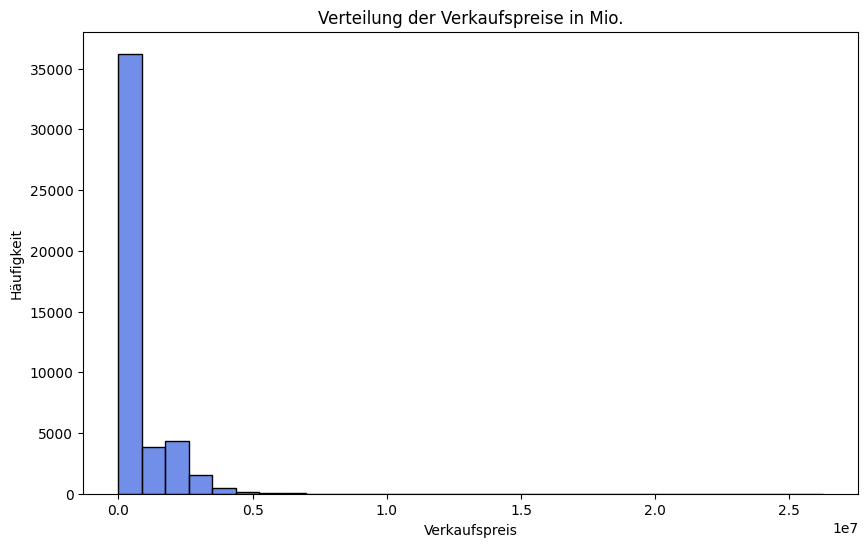

In [46]:
colors = ['royalblue']
plt.figure(figsize=(10, 6))
sns.histplot(df['Sale_price'], bins=30, color=colors[0])
plt.title('Verteilung der Verkaufspreise in Mio.')
plt.xlabel('Verkaufspreis')
plt.ylabel('Häufigkeit')
plt.show()

/var/folders/_q/bm3pcfj16fn_92vfk8tdrlbm0000gn/T/ipykernel_22031/3398001209.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Nbhd', y='Sale_price', data=df, palette=colors)
/var/folders/_q/bm3pcfj16fn_92vfk8tdrlbm0000gn/T/ipykernel_22031/3398001209.py:3: UserWarning: 
The palette list has fewer values (1) than needed (184) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Nbhd', y='Sale_price', data=df, palette=colors)


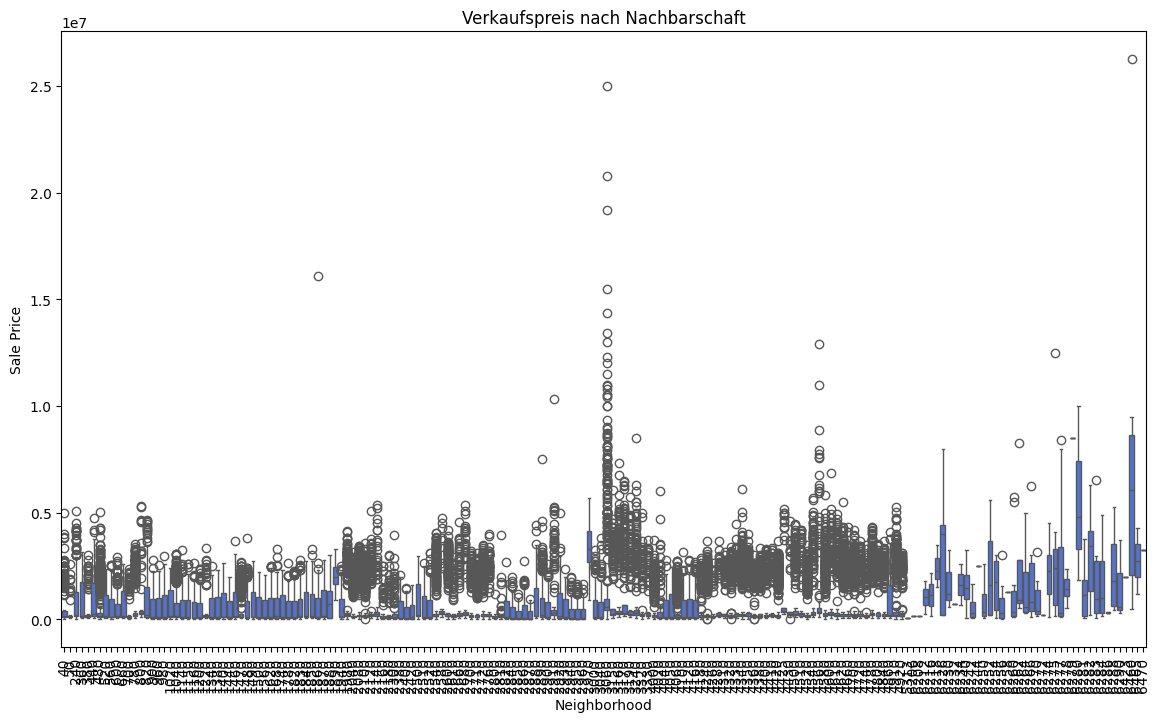

In [48]:
# Preis nach Nachberschaft
plt.figure(figsize=(14, 8))
sns.boxplot(x='Nbhd', y='Sale_price', data=df, palette=colors)
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.title('Verkaufspreis nach Nachbarschaft')
plt.xticks(rotation=90)
plt.show()


/var/folders/_q/bm3pcfj16fn_92vfk8tdrlbm0000gn/T/ipykernel_22031/3707609385.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Nbhd', y='Sale_price', data=df_filtered, palette=colors)
/var/folders/_q/bm3pcfj16fn_92vfk8tdrlbm0000gn/T/ipykernel_22031/3707609385.py:7: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Nbhd', y='Sale_price', data=df_filtered, palette=colors)


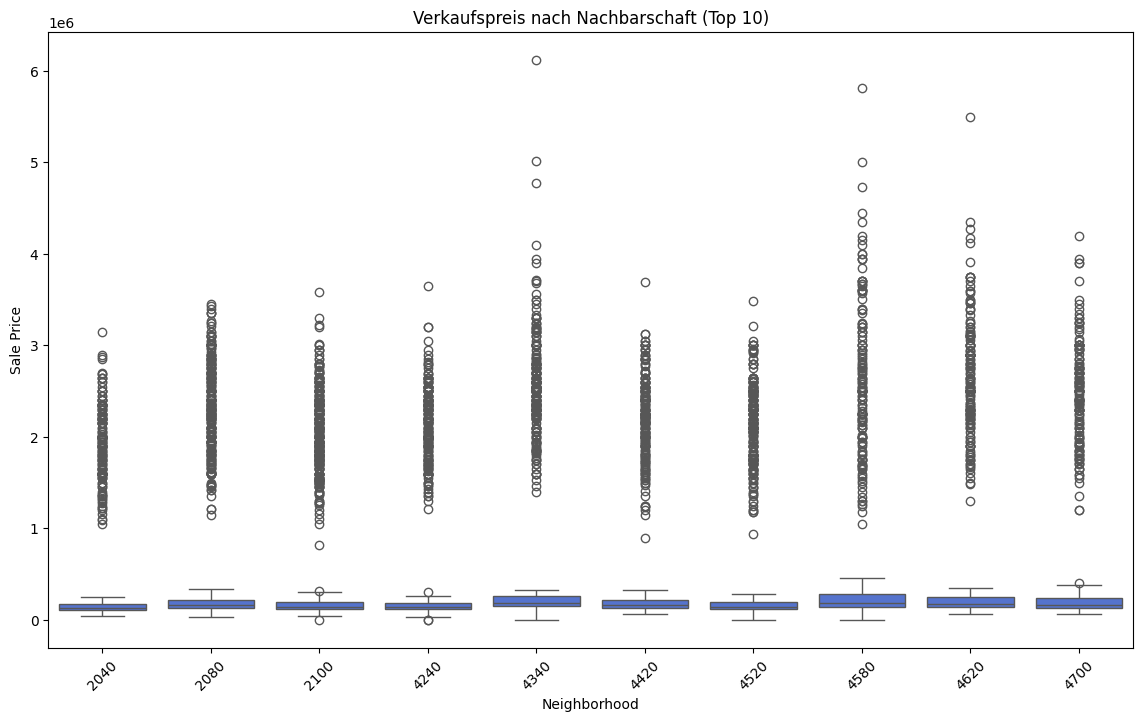

In [49]:

# Nachbarschaften nach der Häufigkeit der Verkäufe filtern
top_neighborhoods = df['Nbhd'].value_counts().index[:10]  # Top 10 Nachbarschaften
df_filtered = df[df['Nbhd'].isin(top_neighborhoods)]

# Boxplot erstellen
plt.figure(figsize=(14, 8))
sns.boxplot(x='Nbhd', y='Sale_price', data=df_filtered, palette=colors)
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.title('Verkaufspreis nach Nachbarschaft (Top 10)')
plt.xticks(rotation=45)  # Rotation anpassen, wenn notwendig
plt.show()


/var/folders/_q/bm3pcfj16fn_92vfk8tdrlbm0000gn/T/ipykernel_31053/2548423595.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Nbhd', y='Sale_price', data=df_filtered, palette=colors)
/var/folders/_q/bm3pcfj16fn_92vfk8tdrlbm0000gn/T/ipykernel_31053/2548423595.py:7: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Nbhd', y='Sale_price', data=df_filtered, palette=colors)


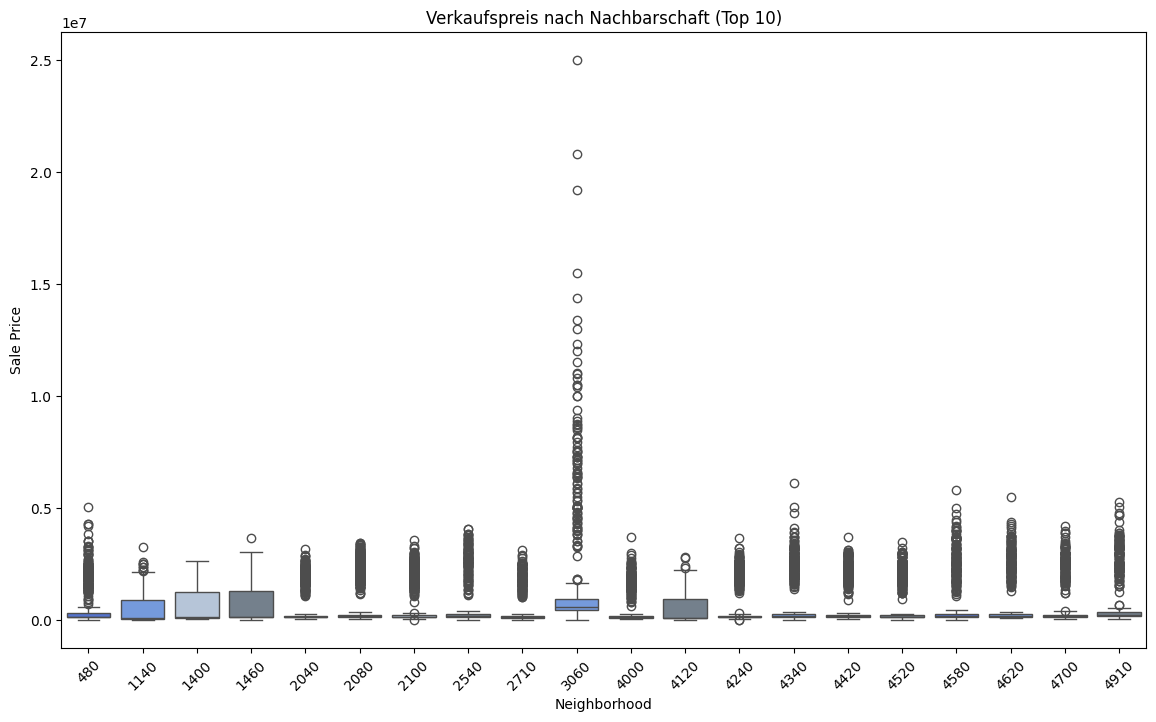

In [25]:
# Nachbarschaften nach der Häufigkeit der Verkäufe filtern
top_neighborhoods = df['Nbhd'].value_counts().index[:20]  # Top 20 Nachbarschaften
df_filtered = df[df['Nbhd'].isin(top_neighborhoods)]

# Boxplot erstellen
plt.figure(figsize=(14, 8))
sns.boxplot(x='Nbhd', y='Sale_price', data=df_filtered, palette=colors)
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.title('Verkaufspreis nach Nachbarschaft (Top 10)')
plt.xticks(rotation=45)  # Rotation anpassen, wenn notwendig
plt.show()


/var/folders/_q/bm3pcfj16fn_92vfk8tdrlbm0000gn/T/ipykernel_31053/964526953.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Nbhd', y='Sale_price', data=df_3060, palette='Set2')


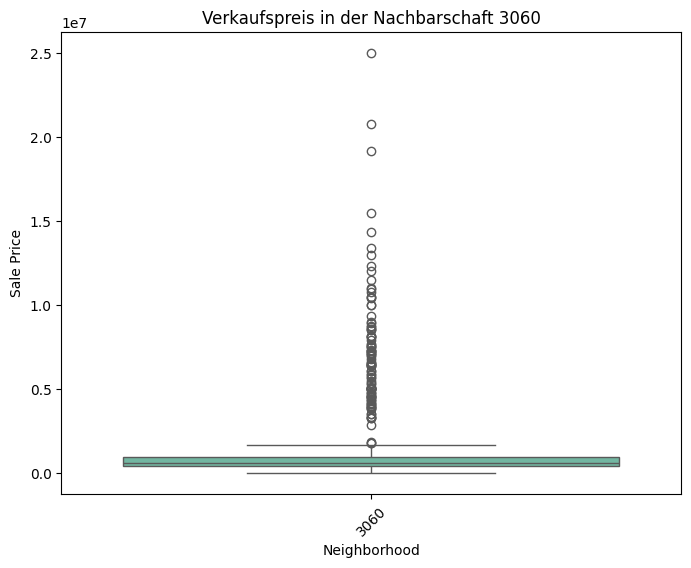

In [26]:
df_3060 = df[df['Nbhd'] == 3060]

# Boxplot erstellen
plt.figure(figsize=(8, 6))
sns.boxplot(x='Nbhd', y='Sale_price', data=df_3060, palette='Set2')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.title('Verkaufspreis in der Nachbarschaft 3060')
plt.xticks(rotation=45)  # Rotation anpassen, wenn notwendig
plt.show()

/var/folders/_q/bm3pcfj16fn_92vfk8tdrlbm0000gn/T/ipykernel_31053/2933444210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Nbhd', y='Sale_price', data=df_480, palette='Set2')


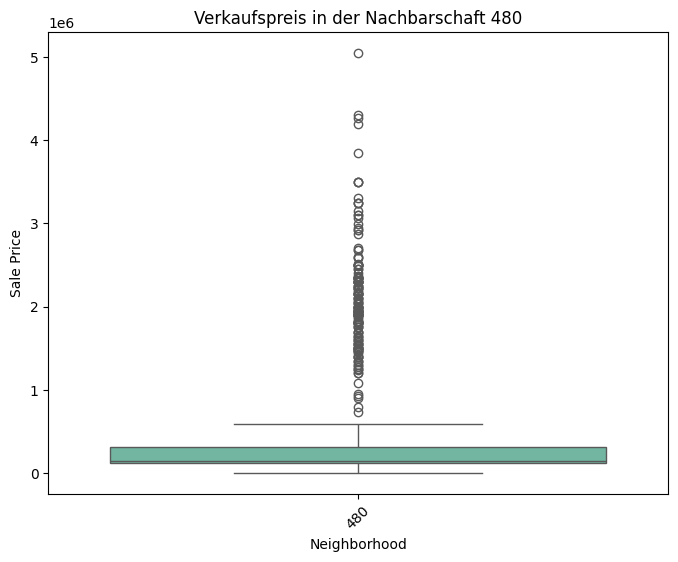

In [32]:
df_480 = df[df['Nbhd'] == 480]

# Boxplot erstellen
plt.figure(figsize=(8, 6))
sns.boxplot(x='Nbhd', y='Sale_price', data=df_480, palette='Set2')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.title('Verkaufspreis in der Nachbarschaft 480')
plt.xticks(rotation=45)  # Rotation anpassen, wenn notwendig
plt.show()

/var/folders/_q/bm3pcfj16fn_92vfk8tdrlbm0000gn/T/ipykernel_42618/2881790032.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='District', y='Sale_price', data=df, palette=colors)
/var/folders/_q/bm3pcfj16fn_92vfk8tdrlbm0000gn/T/ipykernel_42618/2881790032.py:3: UserWarning: 
The palette list has fewer values (1) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='District', y='Sale_price', data=df, palette=colors)


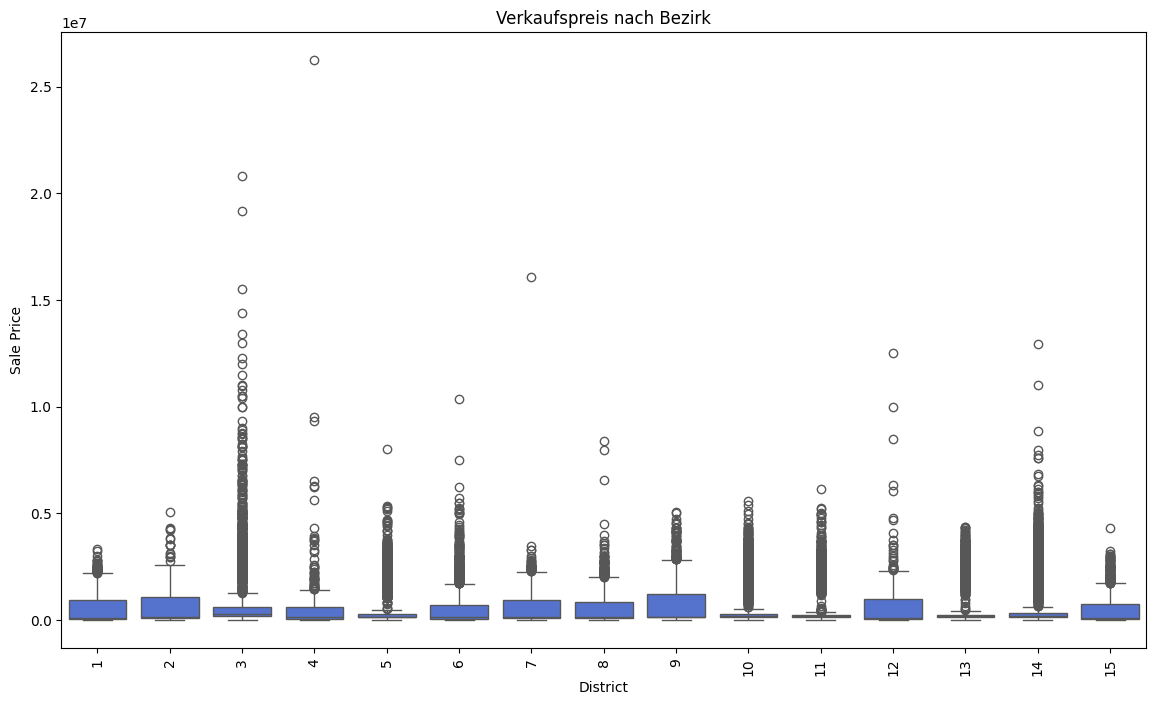

In [40]:
# Preis nach District
plt.figure(figsize=(14, 8))
sns.boxplot(x='District', y='Sale_price', data=df, palette=colors)
plt.xlabel('District')
plt.ylabel('Sale Price')
plt.title('Verkaufspreis nach Bezirk')
plt.xticks(rotation=90)
plt.show()

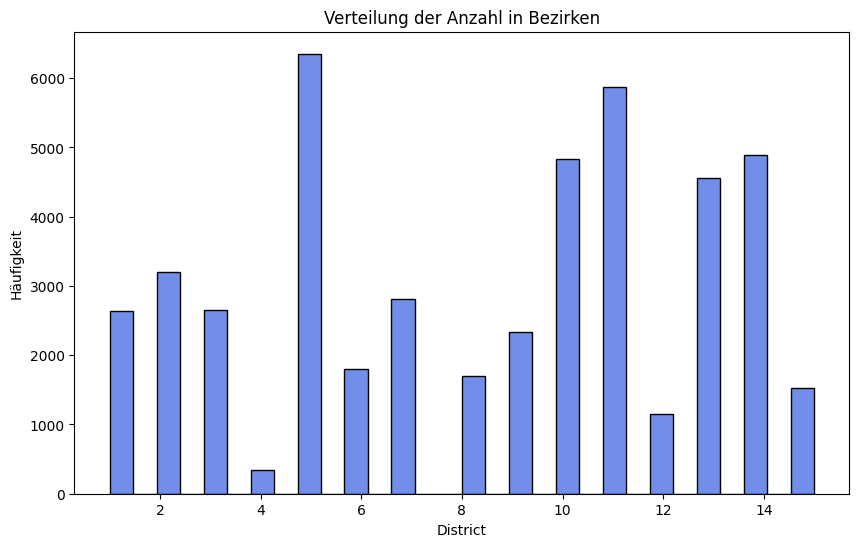

In [39]:
colors = ['royalblue']
plt.figure(figsize=(10, 6))
sns.histplot(df['District'], bins=30, color=colors[0])
plt.title('Verteilung der Anzahl in Bezirken')
plt.xlabel('District')
plt.ylabel('Häufigkeit')
plt.show()

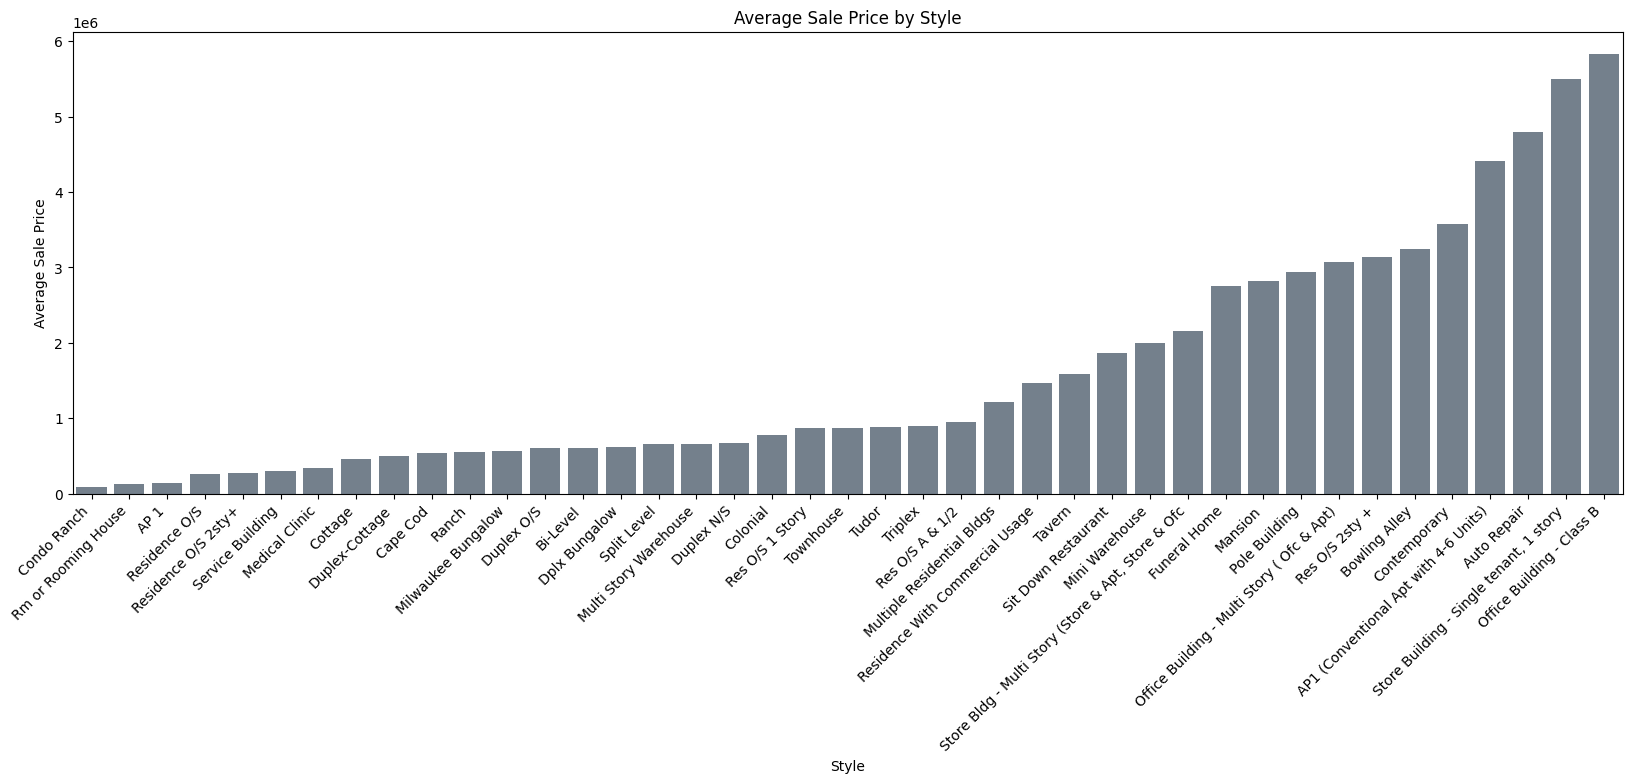

In [50]:
average_price_by_style = df.groupby('Style')['Sale_price'].mean().reset_index()
average_price_by_style = average_price_by_style.sort_values(by='Sale_price')

plt.figure(figsize=(20, 6))
sns.barplot(x='Style', y='Sale_price', data=average_price_by_style, color = 'slategrey')
plt.title('Average Sale Price by Style')
plt.xlabel('Style')
plt.ylabel('Average Sale Price')

plt.xticks(rotation=45, ha="right")
plt.show()


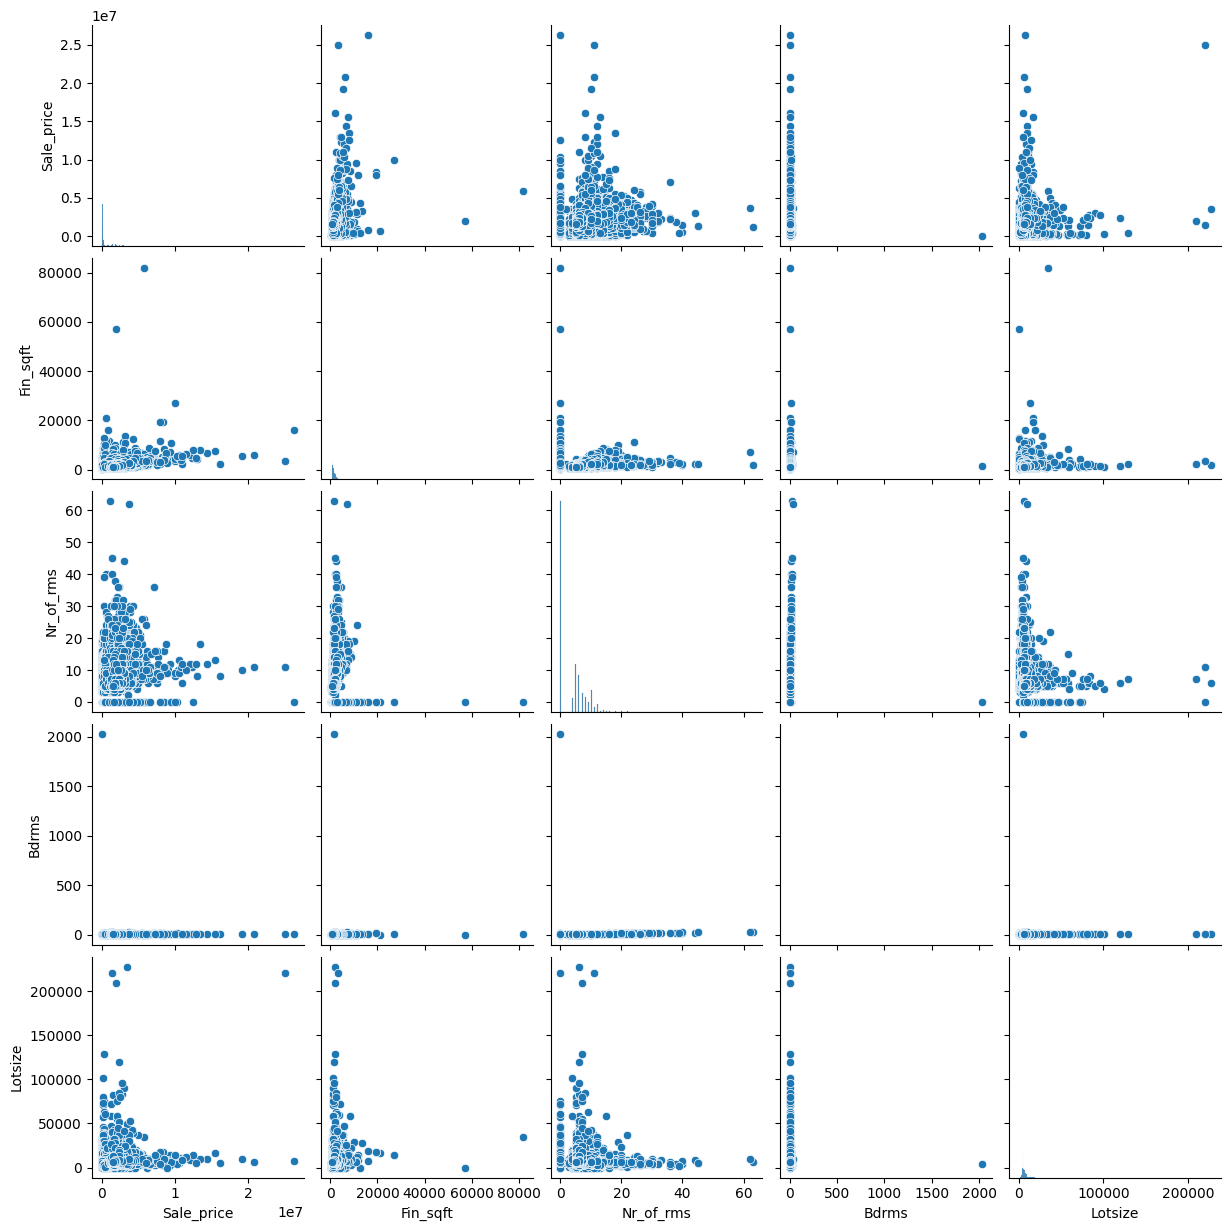

In [51]:
sns.pairplot(df[['Sale_price', 'Fin_sqft', 'Nr_of_rms', 'Bdrms', 'Lotsize']])
plt.show()

/var/folders/_q/bm3pcfj16fn_92vfk8tdrlbm0000gn/T/ipykernel_22031/653955091.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Fin_sqft', y='Sale_price', data=df, palette=colors)


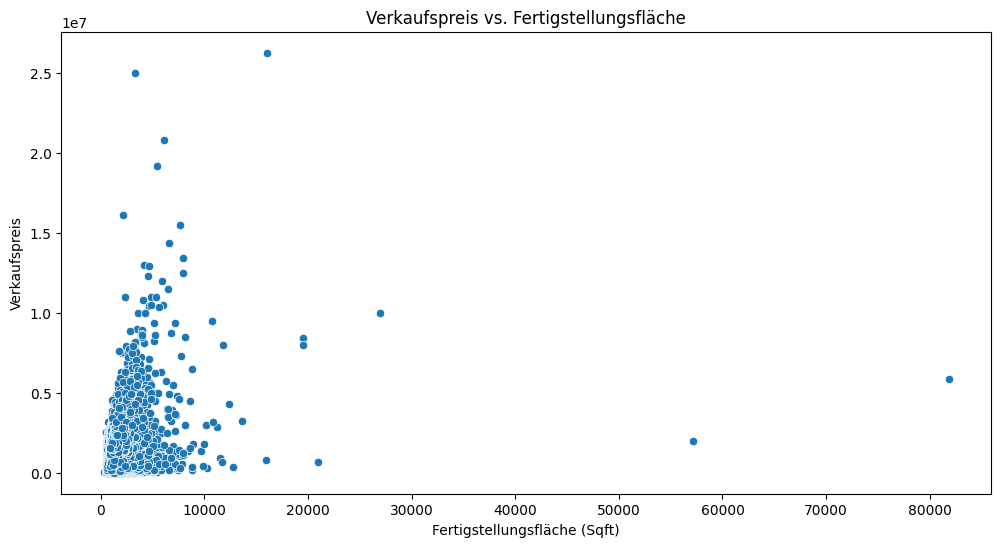

In [52]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Fin_sqft', y='Sale_price', data=df, palette=colors)
plt.title('Verkaufspreis vs. Fertigstellungsfläche')
plt.xlabel('Fertigstellungsfläche (Sqft)')
plt.ylabel('Verkaufspreis')
plt.show()

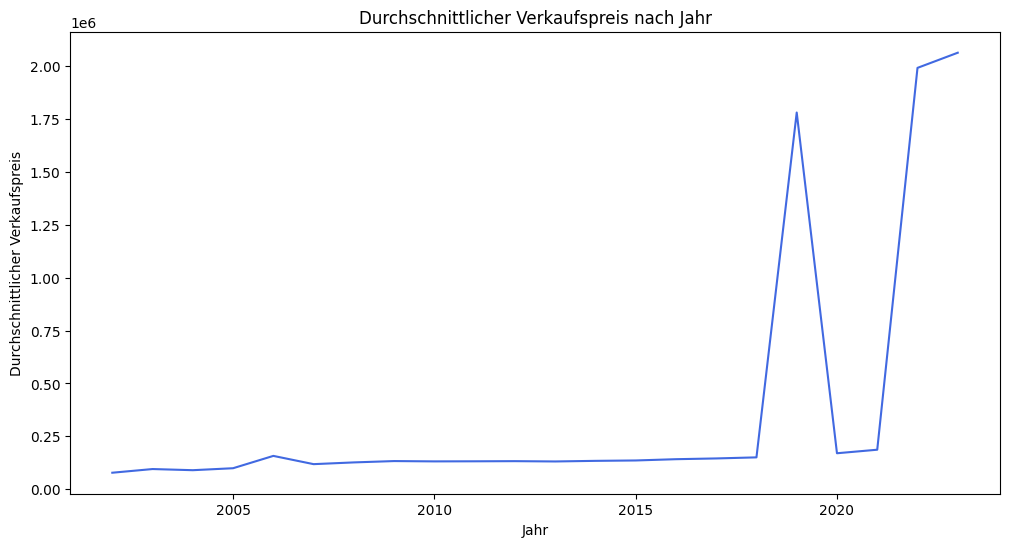

In [53]:
# Zeitlicher Zusammenhang
plt.figure(figsize=(12, 6))
df.groupby('year_sold')['Sale_price'].mean().plot(color='royalblue')
plt.title('Durchschnittlicher Verkaufspreis nach Jahr')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittlicher Verkaufspreis')
plt.show()

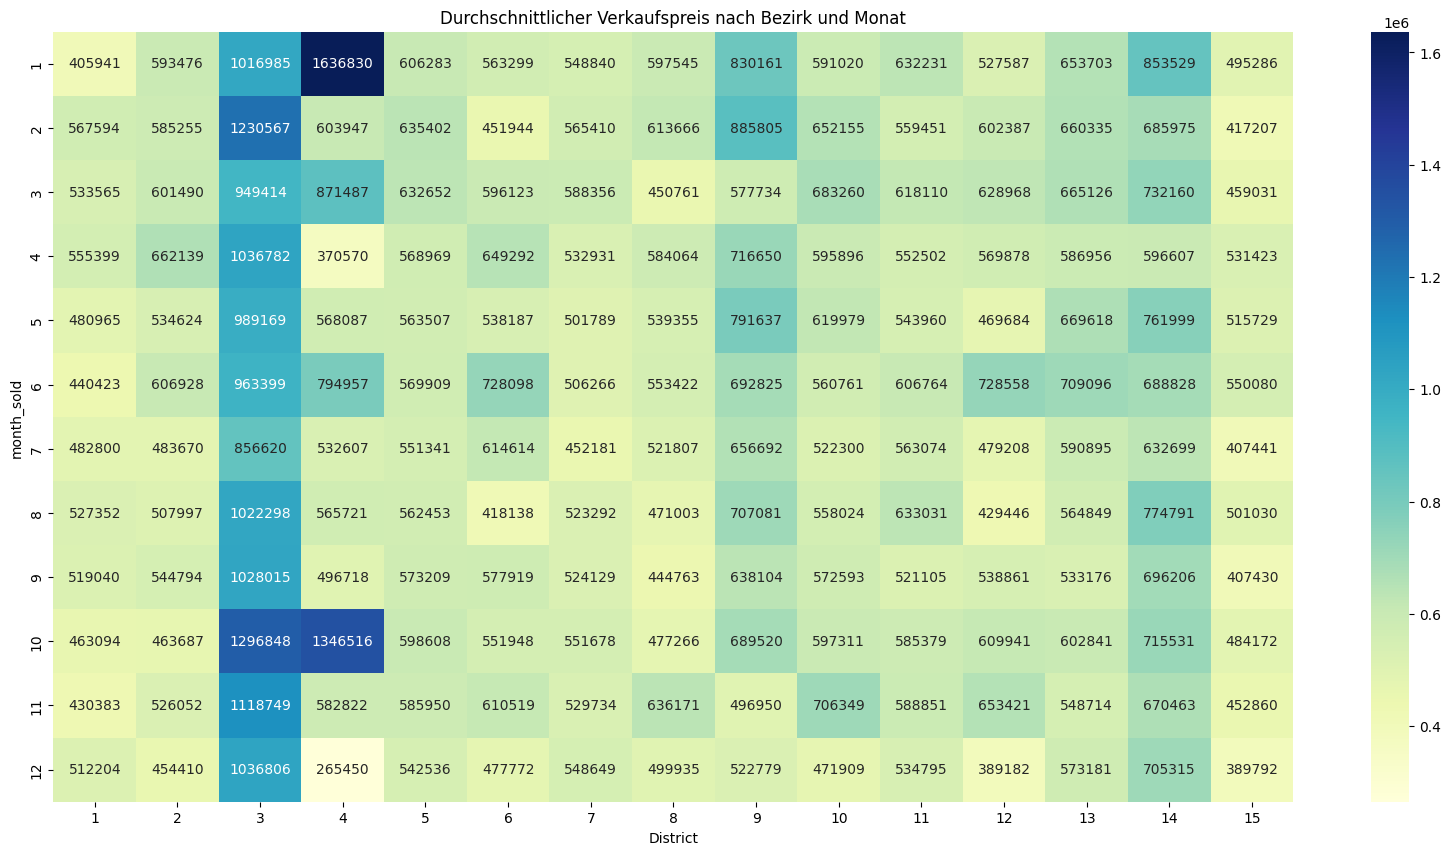

In [55]:
# Heatmap Verkaufspreis nach Bezirk und Monat
plt.figure(figsize=(20, 10))
pivot_table = df.pivot_table(values='Sale_price', index='month_sold', columns='District', aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Durchschnittlicher Verkaufspreis nach Bezirk und Monat')
plt.show()

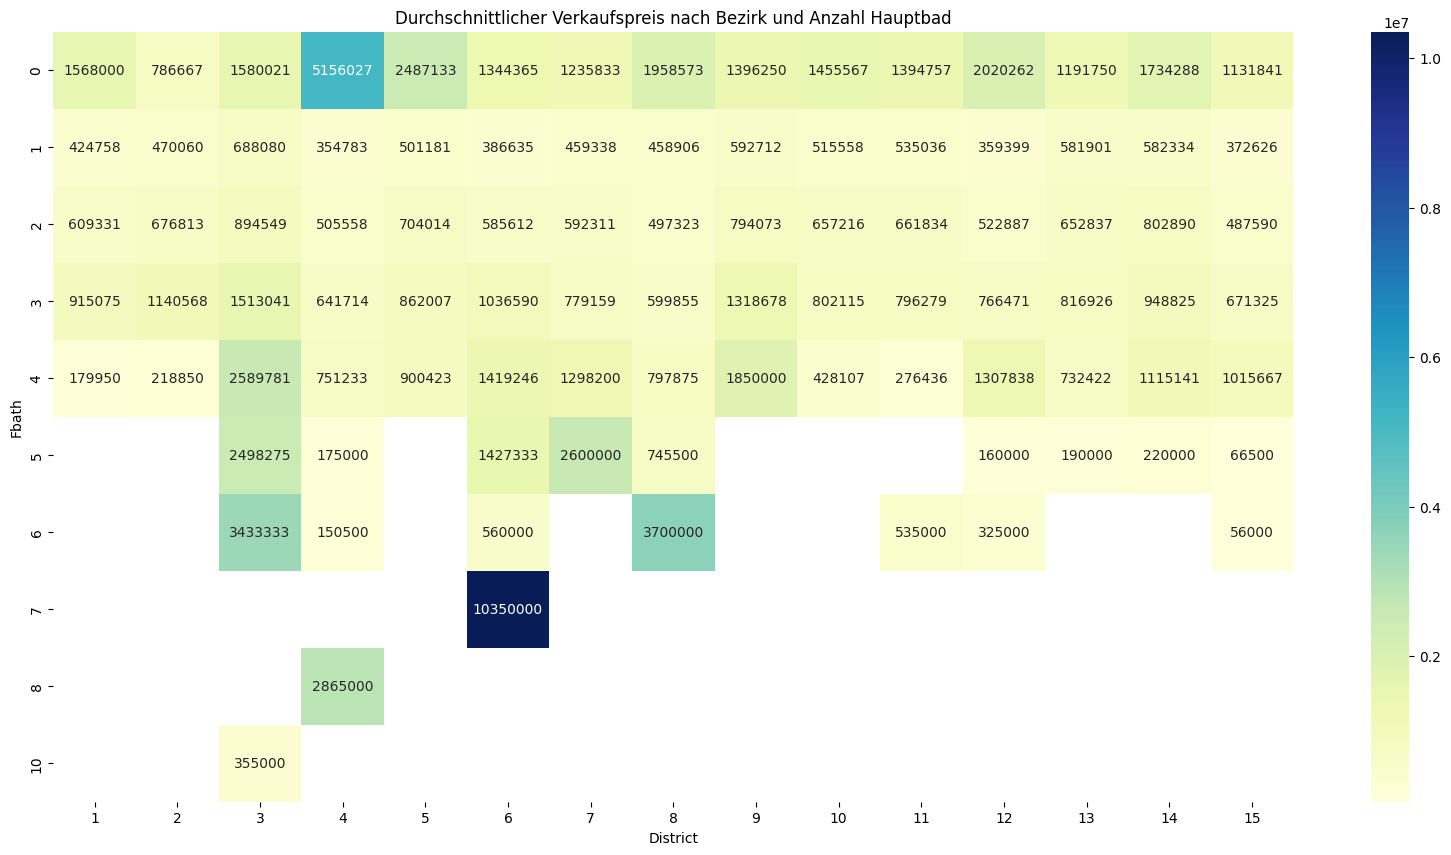

In [66]:
# Heatmap Verkaufspreis nach Bezirk und Monat
plt.figure(figsize=(20, 10))
pivot_table = df.pivot_table(values='Sale_price', index='Fbath', columns='District', aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Durchschnittlicher Verkaufspreis nach Bezirk und ganzen Badezimmer')
plt.show()

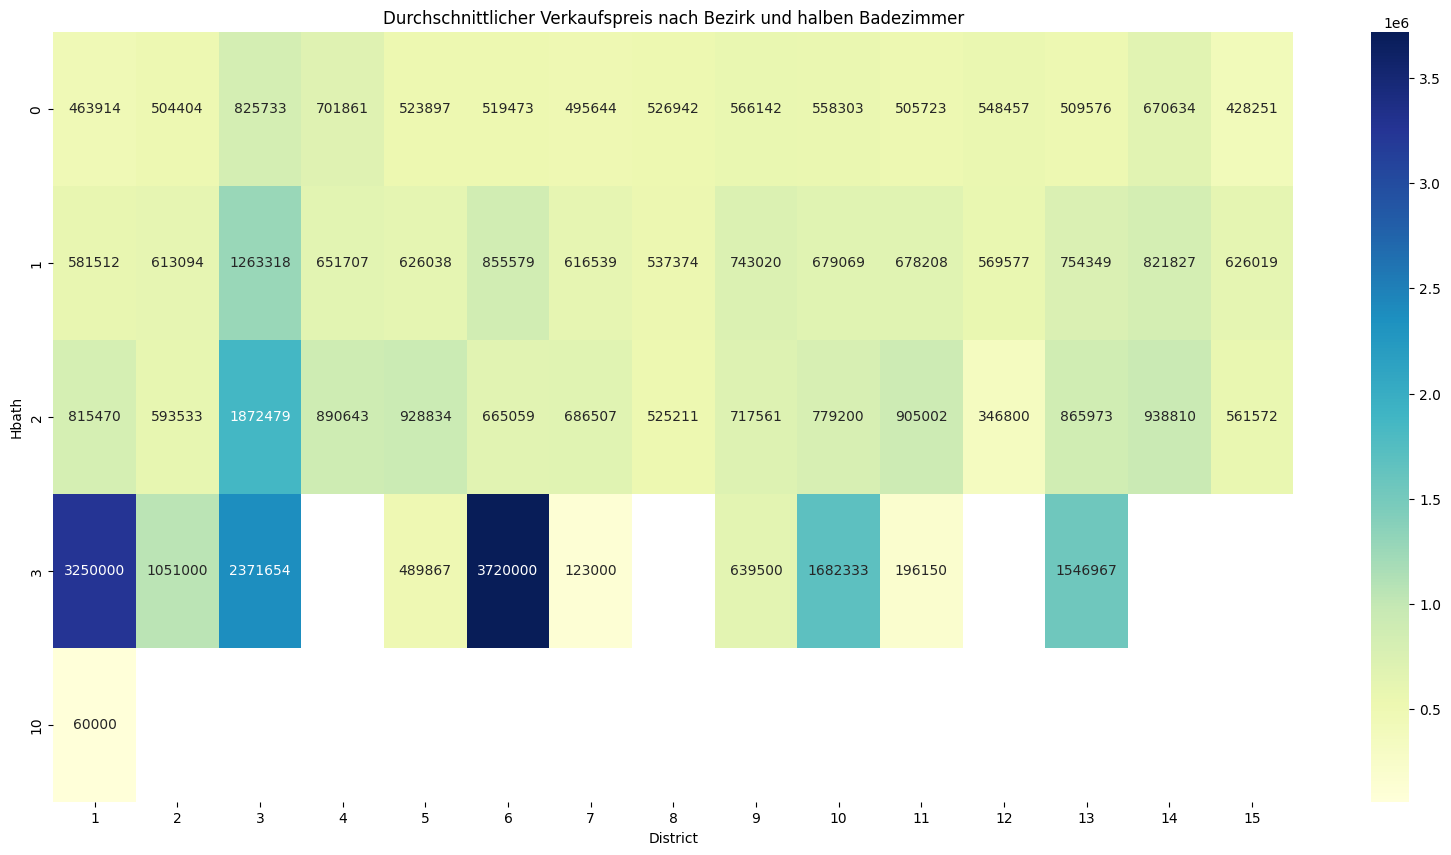

In [67]:
# Heatmap Verkaufspreis nach Bezirk und Monat
plt.figure(figsize=(20, 10))
pivot_table = df.pivot_table(values='Sale_price', index='Hbath', columns='District', aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Durchschnittlicher Verkaufspreis nach Bezirk und halben Badezimmer')
plt.show()

## Korrelationen

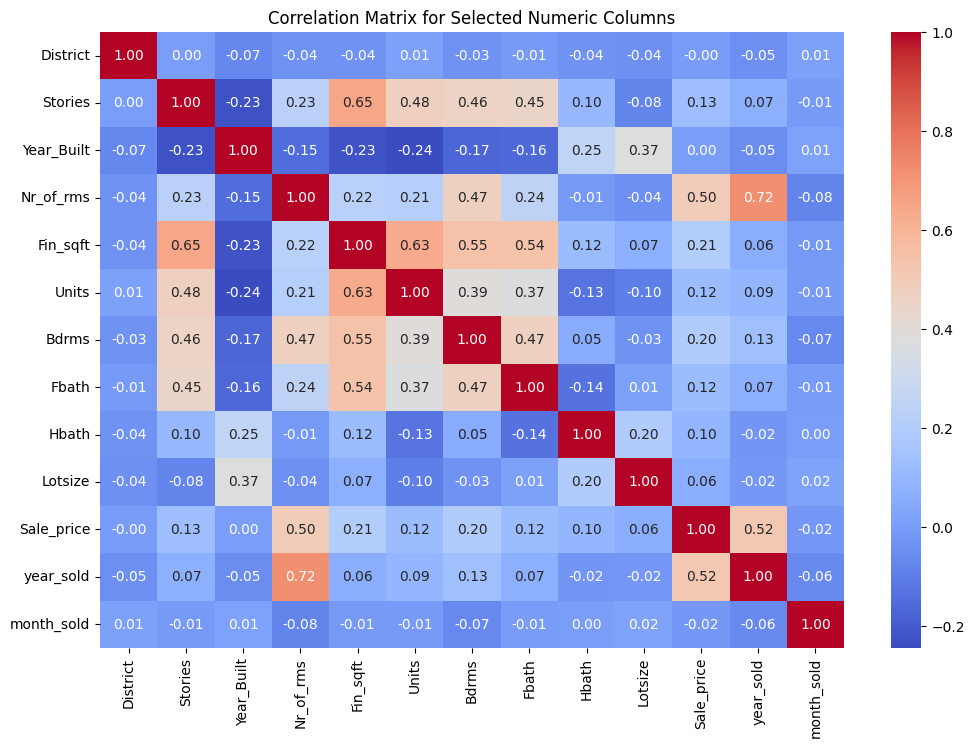

In [41]:
numeric_columns = ['District','Stories', 'Year_Built', 'Nr_of_rms', 'Fin_sqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'Sale_price', 'year_sold', 'month_sold']
df_numeric = df[numeric_columns]

# Korrelationsmatrix erstellen 
correlation_matrix = df_numeric.corr()

# Heatmap erstellen
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Numeric Columns')
plt.show()

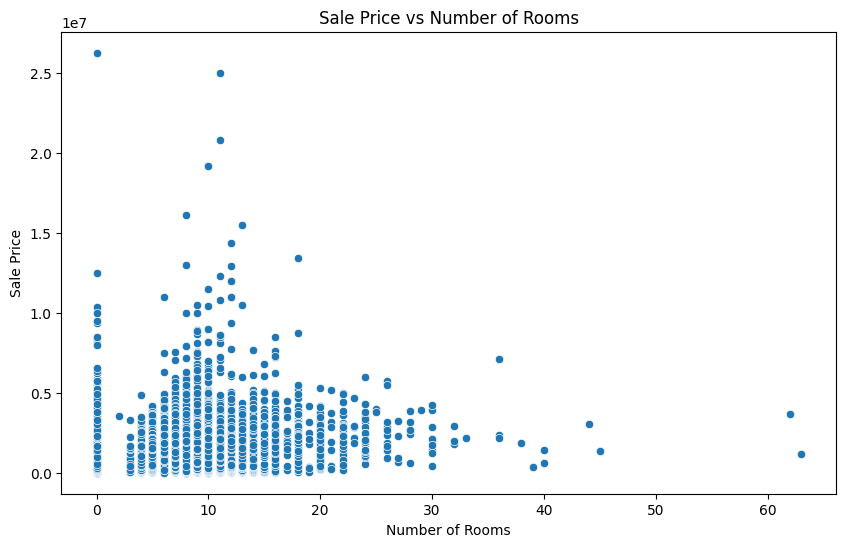

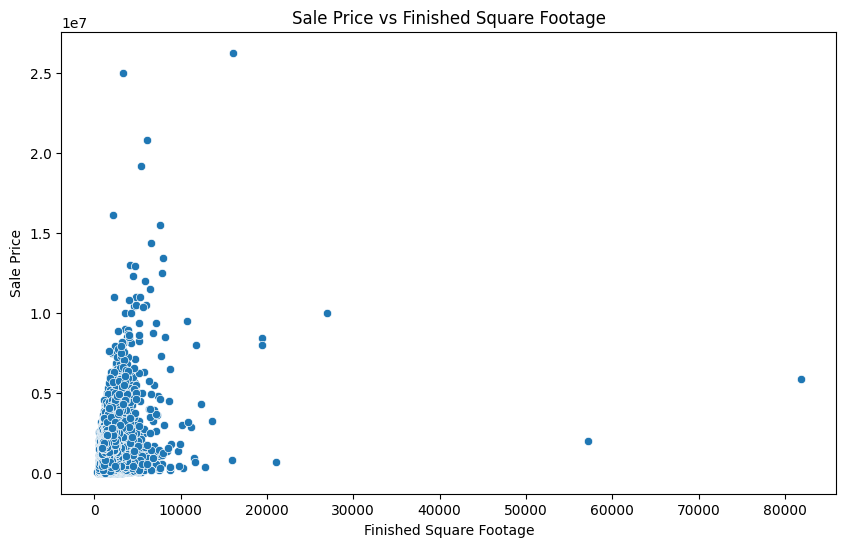

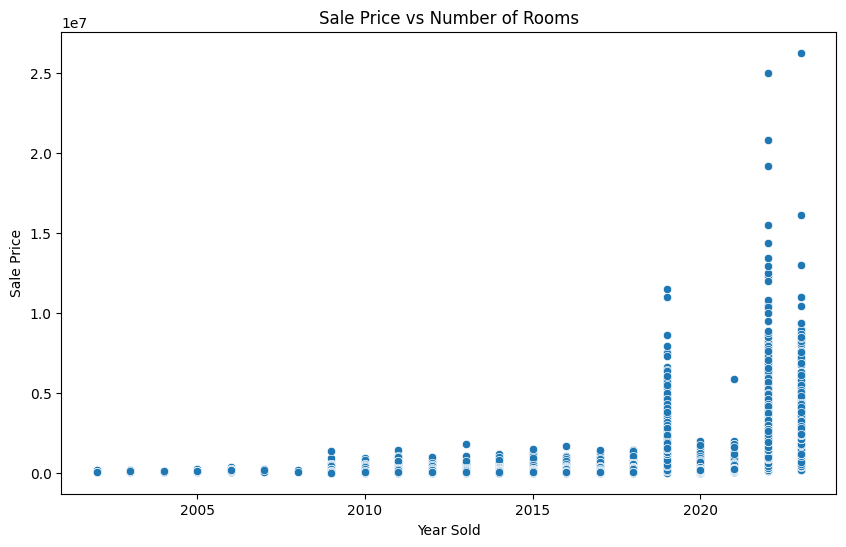

In [42]:
# Sale_price korreliert am meisten mit Verkaufsjahr, Anzahl der Zimmer und den Fin_sqft
# Scatterplot: Sale_price vs Nr_of_rms
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Nr_of_rms', y='Sale_price', data=df)
plt.title('Sale Price vs Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Sale Price')
plt.show()

# Scatterplot: Sale_price vs Fin_sqft
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fin_sqft', y='Sale_price', data=df)
plt.title('Sale Price vs Finished Square Footage')
plt.xlabel('Finished Square Footage')
plt.ylabel('Sale Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year_sold', y='Sale_price', data=df)
plt.title('Sale Price vs Number of Rooms')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.show()

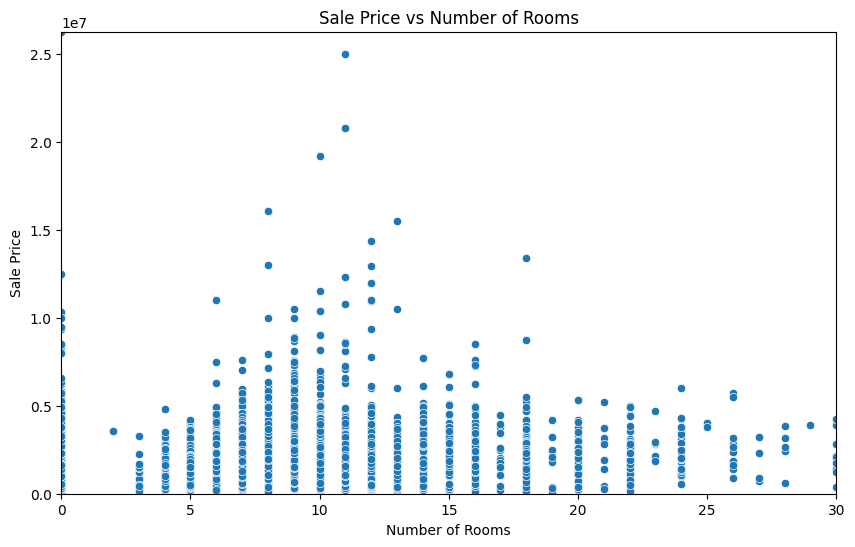

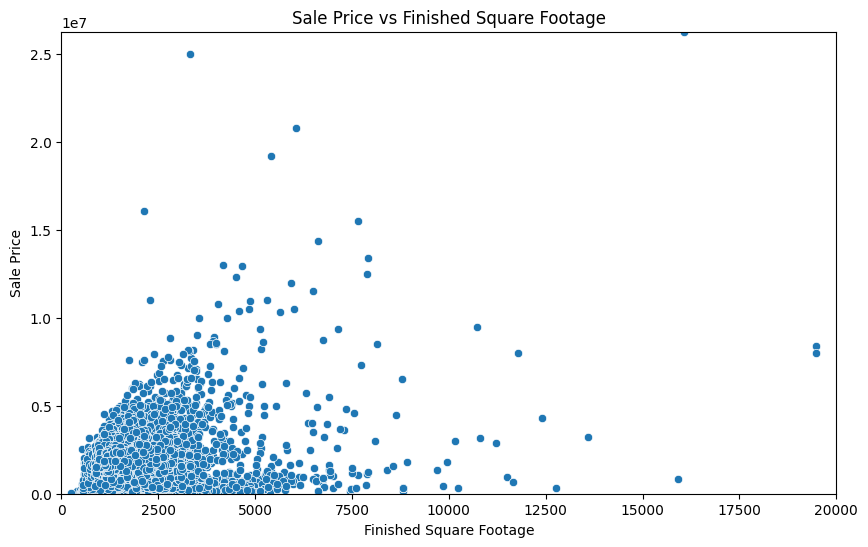

In [58]:
# Ausreißer ausblenden

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Nr_of_rms', y='Sale_price', data=df)
plt.title('Sale Price vs Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Sale Price')
plt.xlim(0, 30)  
plt.ylim(0, df['Sale_price'].max())
plt.show()

# Scatterplot Sale_price vs Fin_sqft
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fin_sqft', y='Sale_price', data=df)
plt.title('Sale Price vs Finished Square Footage')
plt.xlabel('Finished Square Footage')
plt.ylabel('Sale Price')
plt.xlim(0, 20000)  
plt.ylim(0, df['Sale_price'].max()) 
plt.show()


#### Deskriptive Statistik

In [42]:
print(df[['District','Stories', 'Year_Built', 'Nr_of_rms', 'Fin_sqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'Sale_price', 'year_sold', 'month_sold']].describe())

           District       Stories   Year_Built     Nr_of_rms      Fin_sqft  \
count  46658.000000  46658.000000  46658.00000  46658.000000  46658.000000   
mean       8.412298      1.321349   1939.57062      3.422821   1544.611878   
std        4.225484      0.426439     24.89523      4.251942    717.341161   
min        1.000000      1.000000   1835.00000      0.000000    256.000000   
25%        5.000000      1.000000   1923.00000      0.000000   1092.000000   
50%        9.000000      1.000000   1948.00000      0.000000   1355.000000   
75%       12.000000      1.500000   1956.00000      6.000000   1846.000000   
max       15.000000      4.000000   2023.00000     63.000000  26930.000000   

              Units         Bdrms         Fbath         Hbath        Lotsize  \
count  46658.000000  46658.000000  46658.000000  46658.000000   46658.000000   
mean       1.256119      3.546980      1.483776      0.352008    6139.572185   
std        0.621182      1.326918      0.623366      0.53

## Zusammenfassung

1. Auf Basis der Korrelationsmatrix scheinen **Lotsize**, **Year_Build**, **Units**, **Bdrms** sehr **unrelevant** für de Verkaufspreis zu sein

2. Auf Basis der Heatmap kann der **Verkaufsmonat** und die **Anzahl der Zimmer** als relevante Variable ausgeschlossen werden zudem scheint die **Art des Badezimmers** (halb oder ganz) **keine** hohe **Relevanz** zu spielen

3. Mit fachlichem Wissen sollten folgende Variablen in die Modellauswahl **einbezogen** werden: **Neighborhood** (die Nachbarschaft bzw. die Lage eines Objektes ist oft ein auschlaggebendes Kriterium (z. B. A-D Kategorisierung)) und **Style** (auch hier je nach Art z. B. gewerblich oder Art des Stils z. B. Mansion variieren die Preise)



### Info-Grafik

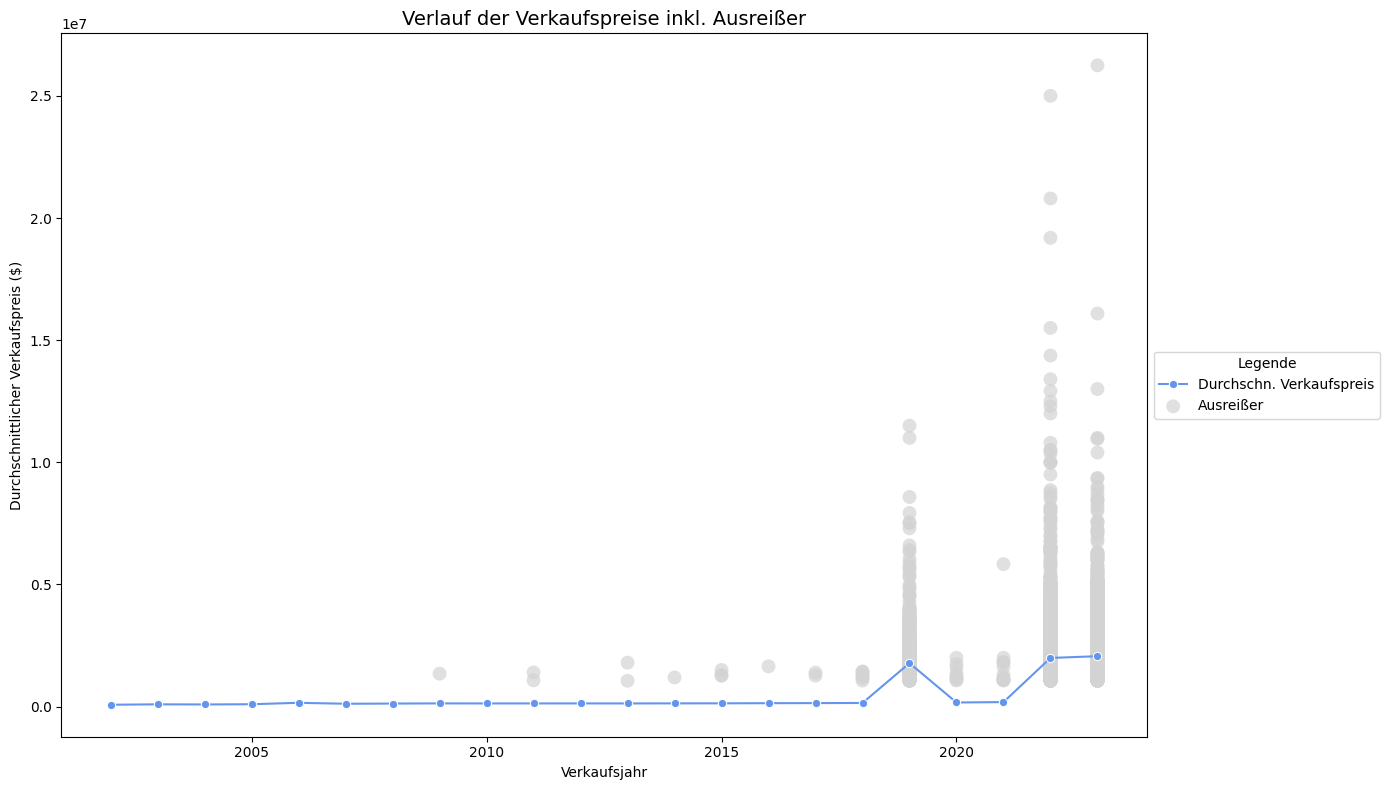

In [53]:
df['year_sold'] = df['year_sold'].astype(int)

# Gruppieren nach Jahr und Durchschnitt der Verkaufspreise berechnen
df_yearly = df.groupby('year_sold')['Sale_price'].mean().reset_index()

# Berechnung der IQR und Bestimmung der Ausreißer
Q1 = df['Sale_price'].quantile(0.25)
Q3 = df['Sale_price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Sale_price'] < (Q1 - 1.5 * IQR)) | (df['Sale_price'] > (Q3 + 1.5 * IQR))]

plt.figure(figsize=(14, 8))

# Durchschnittlicher Preis im Zeitverlauf
sns.lineplot(data=df_yearly, x='year_sold', y='Sale_price', marker='o', color='cornflowerblue', label='Durchschn. Verkaufspreis')

plt.scatter(outliers['year_sold'], outliers['Sale_price'], color='lightgrey', s=100, label='Ausreißer', edgecolor='none', alpha=0.7)

plt.title('Verlauf der Verkaufspreise inkl. Ausreißer', fontsize=14)
plt.xlabel('Verkaufsjahr', fontsize=10)
plt.ylabel('Durchschnittlicher Verkaufspreis ($)', fontsize=10)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Legende')

plt.grid(False)

plt.tight_layout()
plt.show()